In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import load_iris  

In [11]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

In [12]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

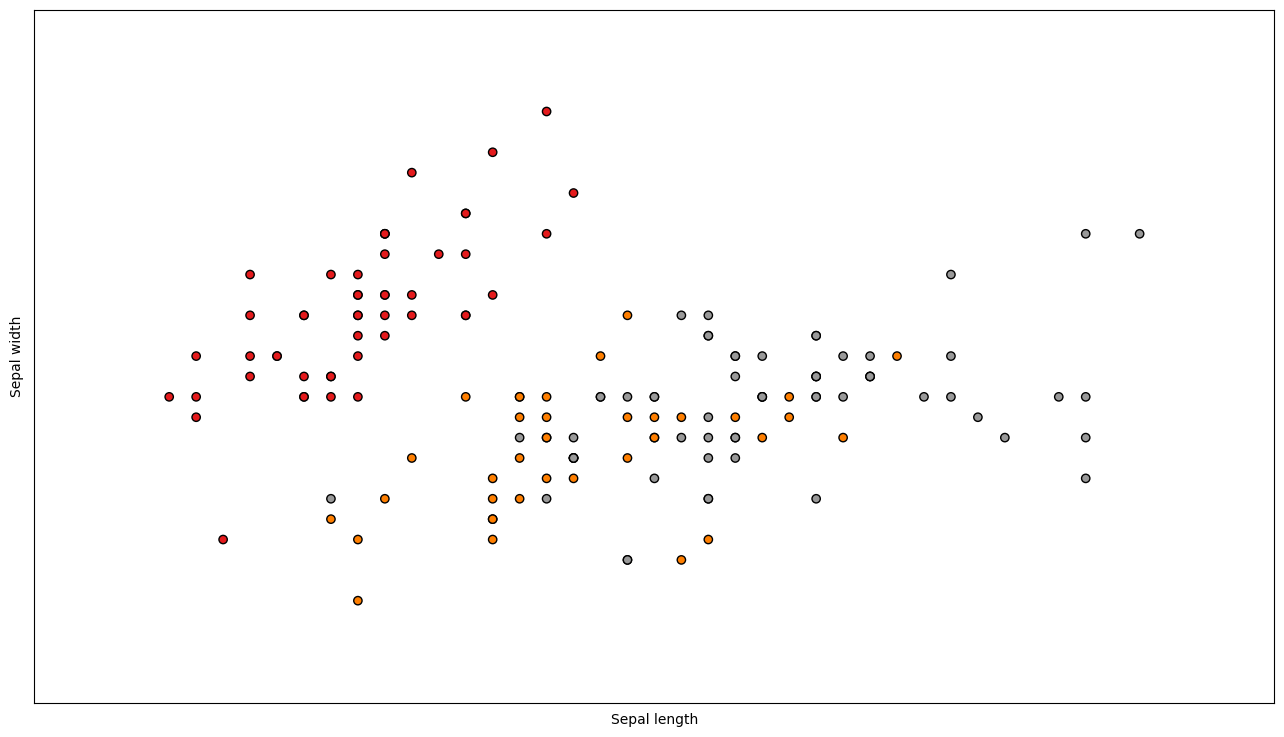

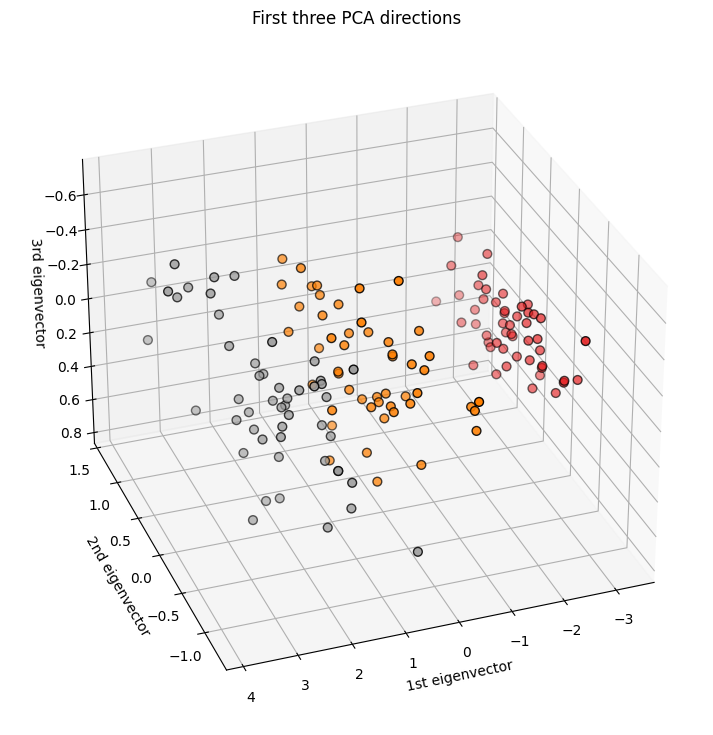

In [15]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(16, 9))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(16, 9))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector") 
ax.set_ylabel("2nd eigenvector") 
ax.set_zlabel("3rd eigenvector") 

plt.show()

In [ ]:
veriler = pd.read_excel("../veri/Iris.xls")
veriler

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x = veriler.iloc[:,0:4].values
y = veriler.iloc[:,4:].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test) 

In [ ]:
def accuracy(cm, y_test):
    size = cm.size
    acc = (cm[0,0] + cm[1,1] + cm[2,2]) / y_test.size
    print(f"acc: {acc}")

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train.ravel())
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy(cm, y_test)

[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
acc: 0.94


2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski")
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy(cm, y_test)

[[16  0  0]
 [ 0 17  2]
 [ 0  2 13]]
acc: 0.92


3. SVC (SVM Classifier)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="poly")
svc.fit(X_train, y_train.ravel() )
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy(cm, y_test)

[[16  0  0]
 [ 0 19  0]
 [ 0  6  9]]
acc: 0.88


4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy(cm, y_test)

[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]
acc: 0.96


5. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy(cm, y_test)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
acc: 0.96


6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = "entropy")
rfc.fit(X_train, y_train.ravel())
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy(cm, y_test)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
acc: 0.96


In [ ]:
y_proba = rfc.predict_proba(X_test)
print(y_proba.T)
print(y_test.T[0])

[[0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.1 1.  0.  0.  0.
  0.9 0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  1.  0.9 1.  0.4 1.  1.  1.  1.  0.  1.  0.9
  0.  0.  0.1 1.  0.  0.  0.2 0.  0.  1.  1.  0.  0.1 0.8 0.  0.1 0.  0.9
  0.1 0.4 1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.7 0. ]
 [1.  0.  0.  1.  0.  1.  0.  0.  0.1 0.  0.6 0.  0.  0.  0.  0.  0.  0.1
  0.  0.  0.9 0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.9 0.1 0.  0.9 1.  0.1
  0.  0.6 0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.3 1. ]]
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-s